<a href="https://colab.research.google.com/github/AlfonsoCastilloFlores/IB_IA_AD2024_1970709/blob/main/Act2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensiones de la imagen: (194, 259, 3)


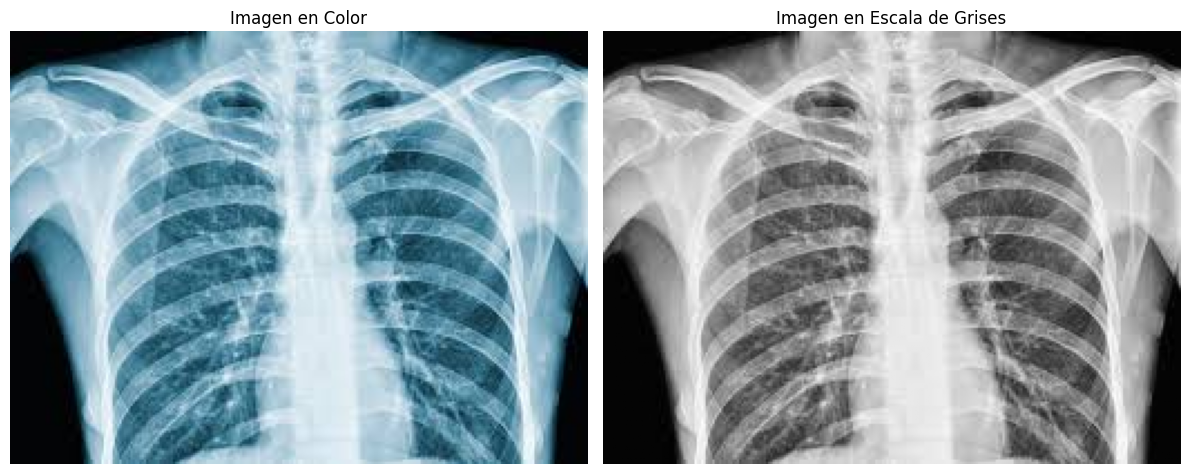

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en color
img_color = cv2.imread('/content/RADIOGRAFIA.jpeg')

# Obtener dimensiones
print("Dimensiones de la imagen:", img_color.shape)

# Convertir a escala de grises
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Mostrar imagen en color y en escala de grises
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen en Color')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.tight_layout()
plt.show()


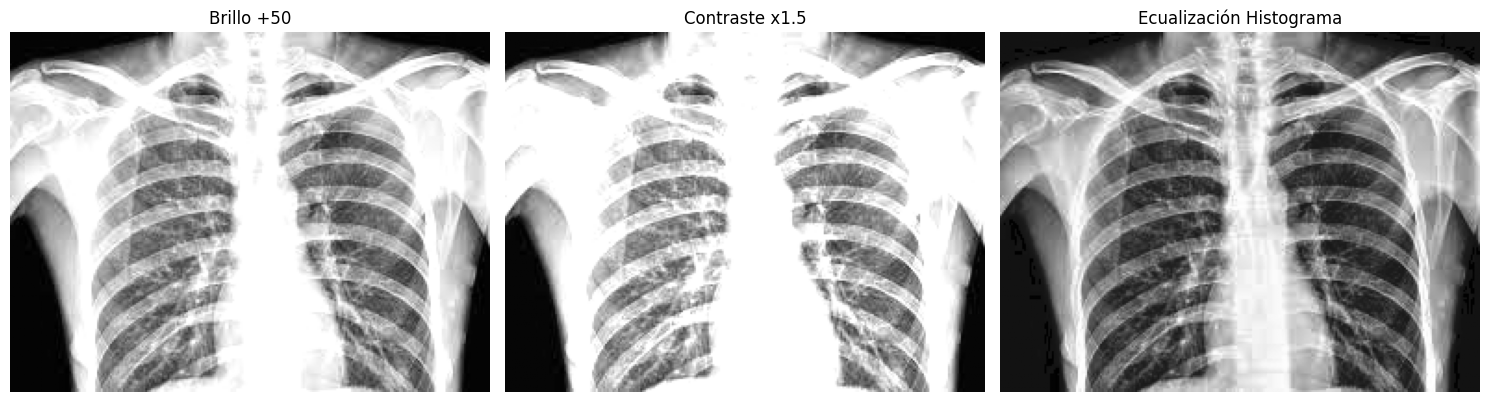

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de tener cargada la imagen original
img_gray = cv2.cvtColor(cv2.imread('/content/RADIOGRAFIA.jpeg'), cv2.COLOR_BGR2GRAY)

# 1. Aumentar brillo (suma constante)
bright_image = cv2.add(img_gray, 50)

# 2. Aumentar contraste (multiplicación por un factor)
contrast_image = cv2.multiply(img_gray, 1.5)
contrast_image = np.clip(contrast_image, 0, 255).astype(np.uint8)

# 3. Ecualización de histograma
equalized_image = cv2.equalizeHist(img_gray)

# Mostrar resultados
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(bright_image, cmap='gray')
plt.title('Brillo +50')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contrast_image, cmap='gray')
plt.title('Contraste x1.5')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Ecualización Histograma')
plt.axis('off')

plt.tight_layout()
plt.show()


La mejor opción es la ecualización de histograma, porque:

Mejora el contraste global.
No necesita parámetros manuales.
Realza detalles que no eran visibles en la imagen original.
Evita saturación excesiva.

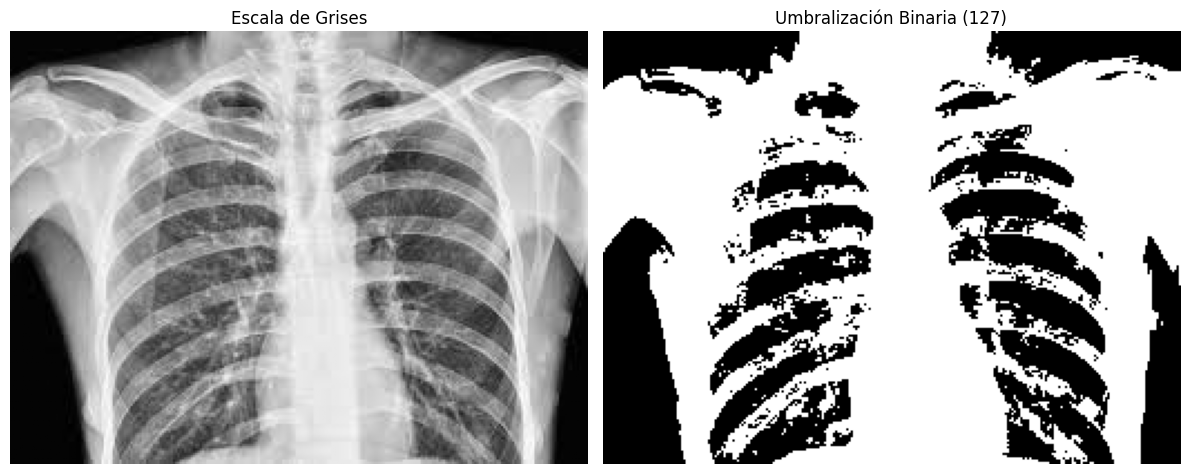

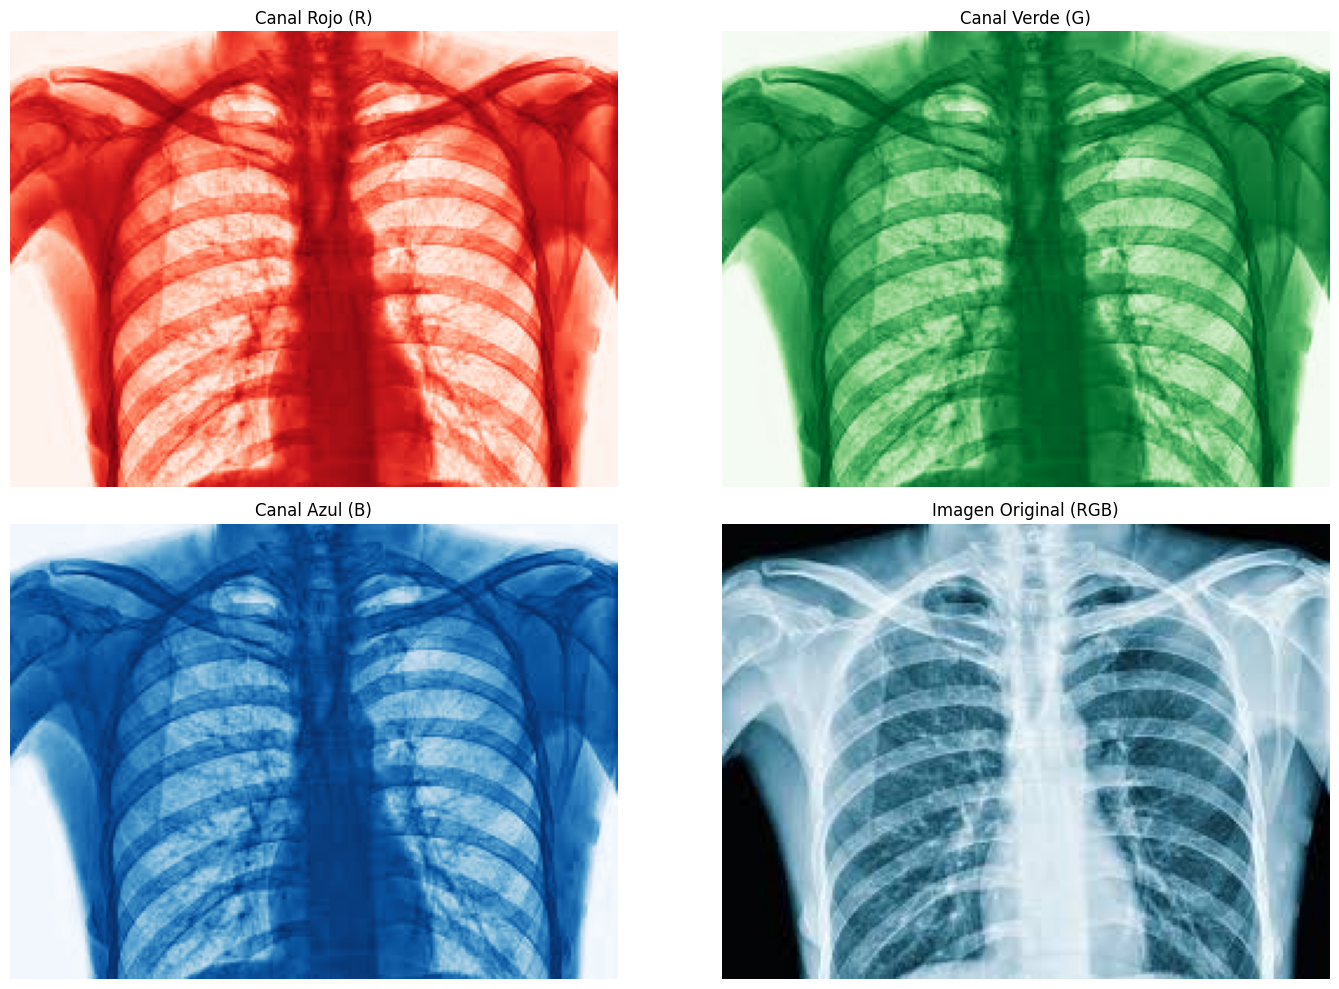

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en color y convertir a escala de grises
img_color = cv2.imread('/content/RADIOGRAFIA.jpeg')  # Cambia la ruta si subes otra imagen
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# INCISO A: Segmentación binaria con umbral fijo
_, thresh_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# INCISO B: Separar canales RGB
b, g, r = cv2.split(img_color)

# Mostrar escala de grises y umbralización
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Escala de Grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh_binary, cmap='gray')
plt.title('Umbralización Binaria (127)')
plt.axis('off')
plt.tight_layout()
plt.show()

# Mostrar los canales RGB
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(r, cmap='Reds')
plt.title('Canal Rojo (R)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(g, cmap='Greens')
plt.title('Canal Verde (G)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(b, cmap='Blues')
plt.title('Canal Azul (B)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()


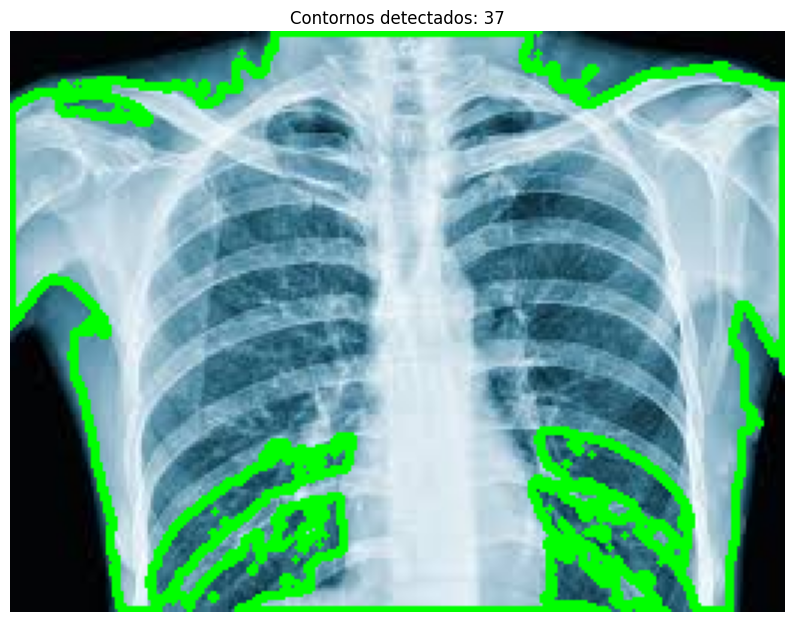

       Área    Perímetro   Centroide
0       0.0     2.000000      (0, 0)
1       0.5     3.414214   (67, 188)
2       0.0     2.000000      (0, 0)
3       2.5     6.242641   (92, 182)
4       0.0     4.828427      (0, 0)
5       0.0     0.000000      (0, 0)
6       1.0     4.828427  (199, 177)
7       0.0     0.000000      (0, 0)
8       0.0     0.000000      (0, 0)
9       0.5     3.414214   (83, 175)
10      0.0     0.000000      (0, 0)
11      0.0     0.000000      (0, 0)
12      0.0     0.000000      (0, 0)
13      0.0     2.000000      (0, 0)
14      0.0     0.000000      (0, 0)
15      0.0     0.000000      (0, 0)
16      0.0     2.000000      (0, 0)
17      5.5    19.899495  (197, 167)
18    185.0   160.509666  (202, 182)
19      0.0     2.828427      (0, 0)
20      0.0     0.000000      (0, 0)
21      0.0     0.000000      (0, 0)
22      1.5     5.414214   (96, 146)
23      0.0     2.000000      (0, 0)
24      0.0     0.000000      (0, 0)
25      0.0     0.000000      (0, 0)
2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Cargar imagen y convertir a escala de grises ---
img_color = cv2.imread('/content/RADIOGRAFIA.jpeg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# --- Aplicar umbral para binarizar la imagen (mismo paso 3A) ---
_, thresh_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# ----------------------------------------------------------------------
# INCISO A: Detección de contornos
# ----------------------------------------------------------------------
contours, _ = cv2.findContours(thresh_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos sobre copia de la imagen original
contour_img = img_color.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Mostrar imagen con contornos
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title(f'Contornos detectados: {len(contours)}')
plt.axis('off')
plt.show()

# ----------------------------------------------------------------------
# INCISO B: Cálculo de propiedades geométricas
# ----------------------------------------------------------------------
propiedades = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    # ------------------------------------------------------------------
    # INCISO C: Cálculo de centroide
    # ------------------------------------------------------------------
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    propiedades.append({
        'Área': area,
        'Perímetro': perimeter,
        'Centroide': (cx, cy)
    })

# Mostrar resultados en tabla
df = pd.DataFrame(propiedades)
print(df)
